#**Universidade Federal do Pará**
*Núcleo de Desenvolvimento Amazônico em Engenharia - NDAE*

*Programa de Pós-graducação em Computação Aplicada - PPCA*

*Disciplina: Projeto e Arquitetura de Software*
- Professor Doutor Rodrigo Quites
- Discente: Douglas Bechara Santos




# **1.Definição do problema**

Em uma cafeteria, possuímos várias máquinas de café, todas seguem o mesmo modo de funcionamento. A máquina de café pode estar em diferentes estados: **Pronto**, **Preparando**, **Desligado**. Dependendo do estado, o comportamento da máquina muda.

# 2. Implementação do Padrão State em Python
Objetivo

O objetivo do código é demonstrar a aplicação do Padrão de Projeto State em Python. Esse padrão é utilizado para permitir que um objeto altere seu comportamento quando seu estado interno muda, sem que seja necessário alterar a lógica no código principal. Para este exemplo, os estados modelados são: Pronto, Preparando, e Desligado, que são simulados em uma visualização gráfica para facilitar o acompanhamento.

# 3. Estrutura do Código
1. Classe Abstrata State

A interface State define o comportamento comum que todos os estados concretos deverão implementar. Essa classe é abstrata e contém o método handle, que é responsável por executar a ação específica de cada estado e determinar qual será o próximo estado.
```
class State(ABC):
    @abstractmethod
    def handle(self, context):
        pass


# 4. Estados Concretos
Os três estados concretos são representados pelas classes EstadoPronto, EstadoPreparando, e EstadoDesligado. Cada uma dessas classes implementa o método handle da interface State, executando a ação correspondente ao estado atual e definindo qual será o próximo estado.

**Estado Pronto:** Quando o sistema está "Pronto", ele se prepara para mudar para o estado "Preparando".

**Estado Preparando:** O estado "Preparando" simula uma atividade e, em seguida, muda para o estado "Desligado".

**Estado Desligado:** Quando o sistema está "Desligado", ele volta ao estado "Pronto".

```
class EstadoPronto(State):
    def handle(self, context):
        print("Estado: Pronto. Mudando para 'Preparando'.")
        context.set_estado(EstadoPreparando())

class EstadoPreparando(State):
    def handle(self, context):
        print("Estado: Preparando. Mudando para 'Desligado'.")
        context.set_estado(EstadoDesligado())

class EstadoDesligado(State):
    def handle(self, context):
        print("Estado: Desligado. Mudando para 'Pronto'.")
        context.set_estado(EstadoPronto())


# 5. Classe Contexto
A classe Contexto mantém a referência ao estado atual do sistema e gerencia as transições entre os estados. Ela possui dois métodos principais:

set_estado(novo_estado): Define qual será o novo estado do sistema.
executar(): Delega a execução para o estado atual, chamando o método handle.
```
class Contexto:
    def __init__(self, estado_inicial):
        self.estado_atual = estado_inicial
    
    def set_estado(self, novo_estado):
        self.estado_atual = novo_estado
    
    def executar(self):
        self.estado_atual.handle(self)


# 6. Visualização Gráfica
Para tornar a transição de estados mais clara, foi implementada uma visualização simples utilizando a biblioteca matplotlib. A função exibir_estado_visual cria uma janela gráfica que exibe o estado atual através de um retângulo colorido. Cada estado tem uma cor específica:

Pronto: Verde
Preparando: Amarelo
Desligado: Vermelho
Conforme o estado muda, o retângulo muda de cor e o texto dentro dele é atualizado para refletir o estado atual.
```
def exibir_estado_visual(estado_atual):
    fig, ax = plt.subplots()

    if isinstance(estado_atual, EstadoPronto):
        cor = "green"
        texto = "Pronto"
    elif isinstance(estado_atual, EstadoPreparando):
        cor = "yellow"
        texto = "Preparando"
    else:
        cor = "red"
        texto = "Desligado"

    ax.add_patch(patches.Rectangle((0.25, 0.25), 0.5, 0.5, edgecolor='black', facecolor=cor))
    plt.text(0.5, 0.5, texto, horizontalalignment='center', verticalalignment='center', fontsize=15)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')
    plt.show()


# 7. Fluxo de Execução
O programa começa criando uma instância da classe Contexto com o estado inicial definido como Pronto (EstadoPronto). O sistema passa por quatro ciclos de mudança de estado. A cada ciclo, o estado atual é visualizado graficamente e o estado é alterado de acordo com a lógica implementada nos estados concretos.
```
if __name__ == "__main__":
    contexto = Contexto(EstadoPronto())

    for _ in range(4):
        exibir_estado_visual(contexto.estado_atual)
        contexto.executar()
        time.sleep(1)


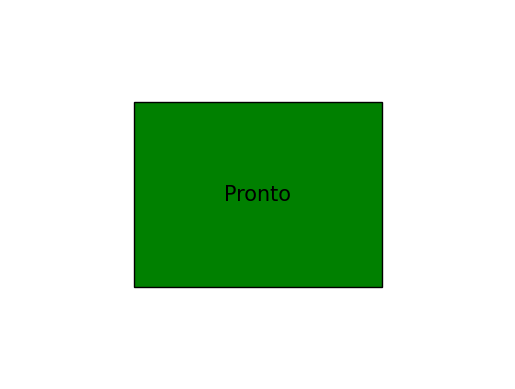

Estado: Pronto. Mudando para 'Preparando'.


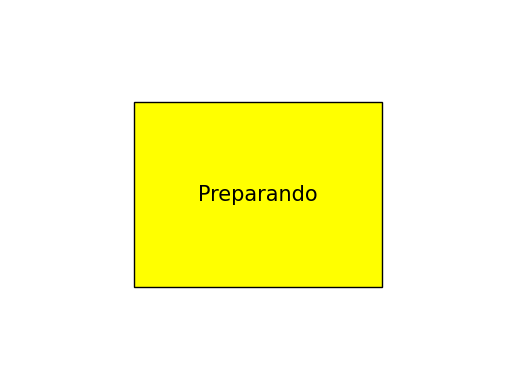

Estado: Preparando. Mudando para 'Desligado'.


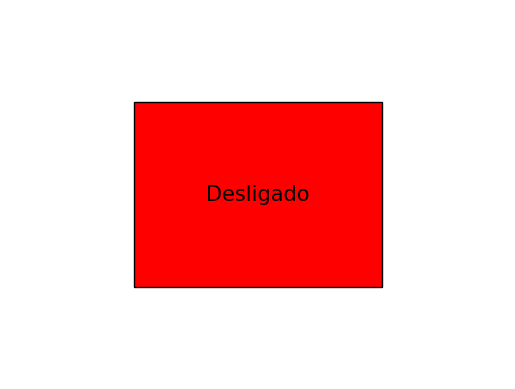

Estado: Desligado. Mudando para 'Pronto'.


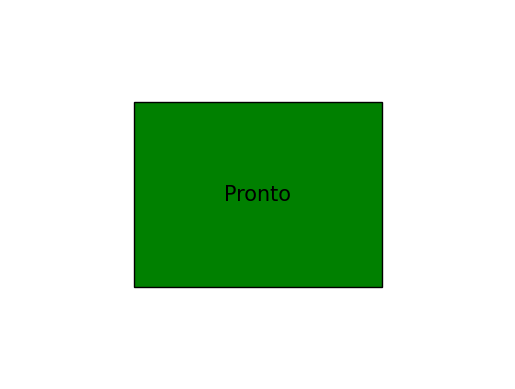

Estado: Pronto. Mudando para 'Preparando'.


In [13]:
# Importa uma funcionalidade para classes abstratas
from abc import ABC, abstractmethod

# Definição da interface State, que é uma classe abstrata
class State(ABC):
    # Método abstrato que será implementado pelos estados concretos
    @abstractmethod
    def handle(self, context):
        pass

# Estado "Pronto"
class EstadoPronto(State):
    def handle(self, context):
        # Exibe a ação correspondente ao Estado "Pronto"
        print("Estado: Pronto. Mudando para 'Preparando'.")
        # Mudança de estado: Após executar, troca para o Estado "Preparando"
        context.set_estado(EstadoPreparando())

# Estado "Preparando"
class EstadoPreparando(State):
    def handle(self, context):
        # Exibe a ação correspondente ao Estado "Preparando"
        print("Estado: Preparando. Mudando para 'Desligado'.")
        # Mudança de estado: Após executar, troca para o Estado "Desligado"
        context.set_estado(EstadoDesligado())

# Estado "Desligado"
class EstadoDesligado(State):
    def handle(self, context):
        # Exibe a ação correspondente ao Estado "Desligado"
        print("Estado: Desligado. Mudando para 'Pronto'.")
        # Mudança de estado: Após executar, troca para o Estado "Pronto"
        context.set_estado(EstadoPronto())

# Classe Contexto que mantém o estado atual
class Contexto:
    def __init__(self, estado_inicial):
        # Atributo que mantém o estado atual
        self.estado_atual = estado_inicial

    # Método para trocar o estado atual
    def set_estado(self, novo_estado):
        self.estado_atual = novo_estado

    # Método para executar a ação do estado atual
    def executar(self):
        self.estado_atual.handle(self)

# Para criar algo visual, utilizaremos uma simulação simples
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Função para exibir visualmente o estado
def exibir_estado_visual(estado_atual):
    fig, ax = plt.subplots()

    # Criação do retângulo para o estado atual
    if isinstance(estado_atual, EstadoPronto):
        cor = "green"
        texto = "Pronto"
    elif isinstance(estado_atual, EstadoPreparando):
        cor = "yellow"
        texto = "Preparando"
    else:
        cor = "red"
        texto = "Desligado"

    # Desenhando o retângulo
    ax.add_patch(patches.Rectangle((0.25, 0.25), 0.5, 0.5, edgecolor='black', facecolor=cor))
    plt.text(0.5, 0.5, texto, horizontalalignment='center', verticalalignment='center', fontsize=15)

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')  # Ocultar os eixos
    plt.show()

# Testando o padrão State com uma visualização
if __name__ == "__main__":
    # Criar o contexto com o estado inicial "Pronto"
    contexto = Contexto(EstadoPronto())  # Estado inicial é "Pronto"

    # Executar o ciclo de mudança de estados 4 vezes para exibir visualmente
    for _ in range(4):
        # Executa o estado atual e mostra a visualização
        exibir_estado_visual(contexto.estado_atual)
        contexto.executar()  # Muda o estado
        time.sleep(1)  # Pausa para ver o resultado antes de mudar o estado
